<a href="https://colab.research.google.com/github/Nerina8/ProyectoDSParteI_Palacio/blob/main/ProyectoDSParteI_Palacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Nerina8/ProyectoDSParteI_Palacio/refs/heads/main/Telco_Cusomer_Churn.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Import




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Buscamos saber cual es la proporcion de clientes que se pudieron retener en el servicio y cuales se dieron de baja.


In [6]:
# Proporción de clientes según la columna 'Churn'
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("Proporción de clientes que abandonaron vs. se quedaron:")
print(churn_counts)

Proporción de clientes que abandonaron vs. se quedaron:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


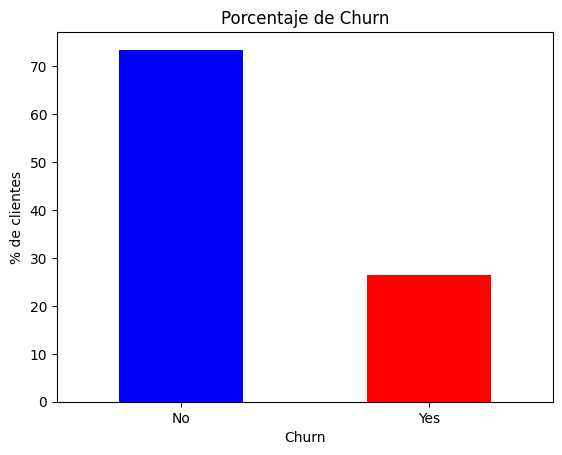

In [9]:
# Visualización
churn_counts.plot(kind='bar', color=['blue', 'red'])
plt.ylabel('% de clientes')
plt.xticks(rotation=0)
plt.title ('Porcentaje de Churn')
plt.show()

In [7]:
# Filtrar solo los clientes que abandonaron
churned = df[df['Churn'] == 'Yes']

# Seleccionar columnas de servicios
servicios = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']

# Contar frecuencia de cada servicio entre los que se fueron
for servicio in servicios:
    print(f"\n{servicio} entre clientes que se fueron:")
    print(churned[servicio].value_counts(normalize=True) * 100)



PhoneService entre clientes que se fueron:
PhoneService
Yes    90.904227
No      9.095773
Name: proportion, dtype: float64

InternetService entre clientes que se fueron:
InternetService
Fiber optic    69.395399
DSL            24.558587
No              6.046014
Name: proportion, dtype: float64

StreamingTV entre clientes que se fueron:
StreamingTV
No                     50.401284
Yes                    43.552702
No internet service     6.046014
Name: proportion, dtype: float64

StreamingMovies entre clientes que se fueron:
StreamingMovies
No                     50.187266
Yes                    43.766720
No internet service     6.046014
Name: proportion, dtype: float64


Proporción de churn por tipo de contrato:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


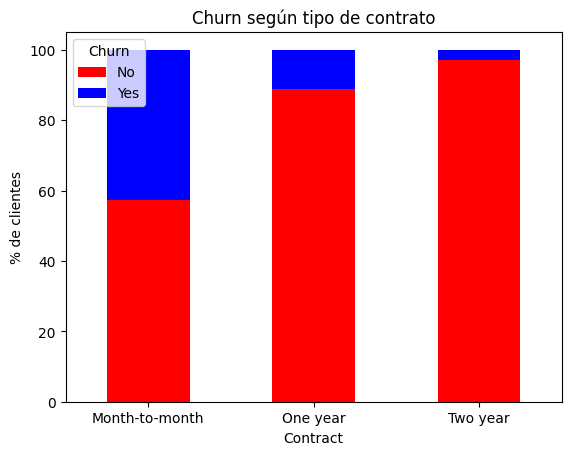

In [10]:
# Comparar tipo de contrato entre clientes que se fueron y los que se quedaron
contrato_churn = df.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

# Normalizar por fila para ver proporciones
contrato_churn_pct = contrato_churn.div(contrato_churn.sum(axis=1), axis=0) * 100
print("Proporción de churn por tipo de contrato:")
print(contrato_churn_pct)

# Visualización
contrato_churn_pct.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('% de clientes')
plt.xticks(rotation=0)
plt.title ('Churn según tipo de contrato')
plt.show()

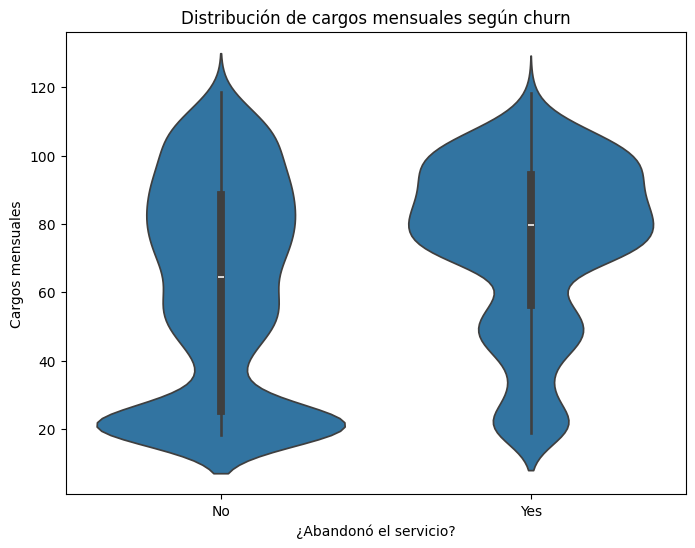

In [11]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribución de cargos mensuales según churn')
plt.xlabel('¿Abandonó el servicio?')
plt.ylabel('Cargos mensuales')
plt.show()

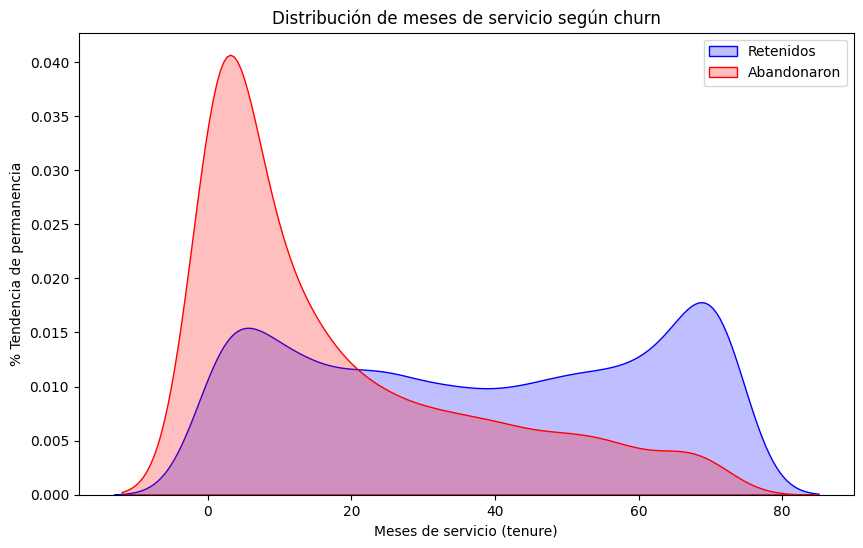

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')


plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['Churn'] == 'No'], x='tenure', label='Retenidos', fill=True, color='blue')
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='tenure', label='Abandonaron', fill=True, color='red')
plt.title('Distribución de meses de servicio según churn')
plt.xlabel('Meses de servicio (tenure)')
plt.ylabel('% Tendencia de permanencia')
plt.legend()
plt.show()

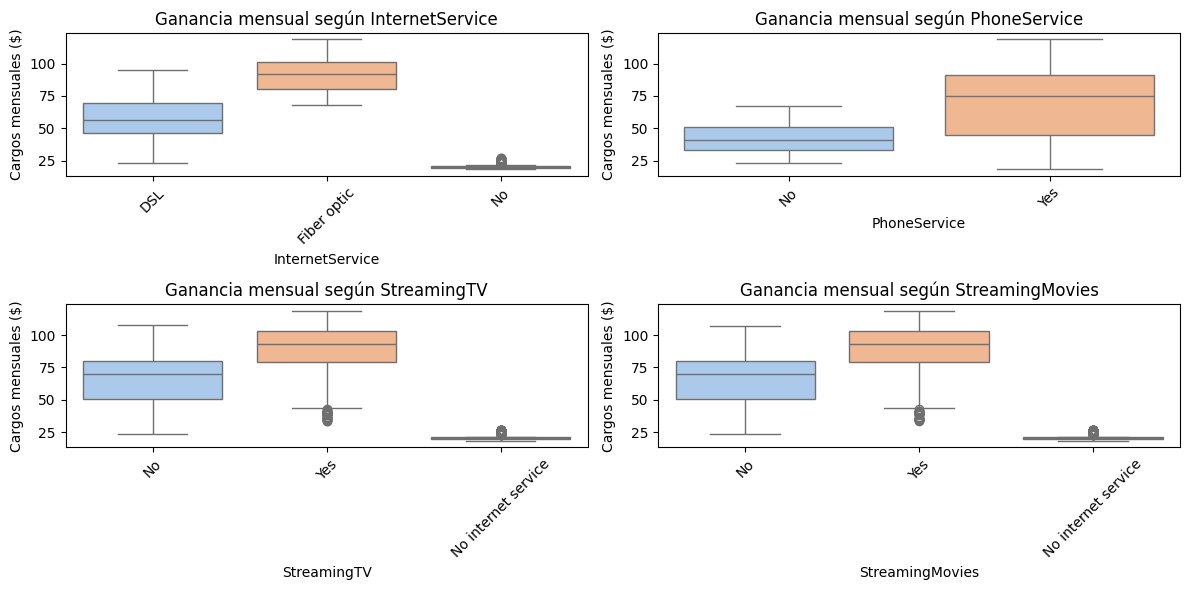

In [14]:
# Asegurarse de que MonthlyCharges sea numérico
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Lista de servicios a analizar
servicios = ['InternetService', 'PhoneService', 'StreamingTV', 'StreamingMovies']

# Crear gráfico boxplot para cada servicio
plt.figure(figsize=(12,6))
for i, servicio in enumerate(servicios, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=servicio, y='MonthlyCharges', hue=servicio, palette='pastel', legend=False)
    plt.title(f'Ganancia mensual según {servicio}')
    plt.xlabel(servicio)
    plt.ylabel('Cargos mensuales ($)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

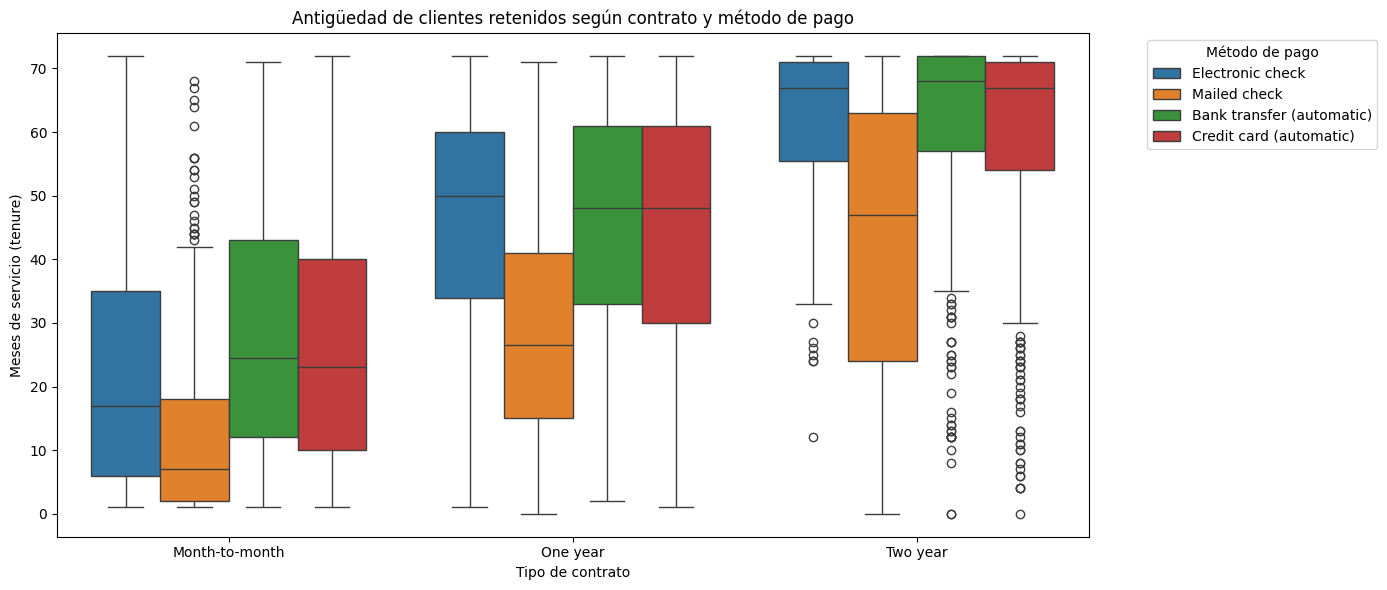

In [15]:
# Asegurarse de que tenure sea numérico
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Filtrar solo clientes que se quedaron
retenidos = df[df['Churn'] == 'No']

# Crear gráfico boxplot multivariado
plt.figure(figsize=(14,6))
sns.boxplot(data=retenidos, x='Contract', y='tenure', hue='PaymentMethod')
plt.title('Antigüedad de clientes retenidos según contrato y método de pago')
plt.xlabel('Tipo de contrato')
plt.ylabel('Meses de servicio (tenure)')
plt.legend(title='Método de pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()